## Reference

Module 2: Introduction to TensorFlow - https://colab.research.google.com/drive/1F_EWVKa8rbMXi3_fG0w7AtcscFq7Hi7B#forceEdit=true&sandboxMode=true
<br>📗 Module 3: Core Learning Algorithms - https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay#forceEdit=true&sandboxMode=true
<br>📘 Module 4: Neural Networks with TensorFlow -   
https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true
<br>📙 Module 5: Deep Computer Vision - https://colab.research.google.com/drive/1ZZXnCjFEOkp_KdNcNabd14yok0BAIuwS#forceEdit=true&sandboxMode=true
<br>📔 Module 6: Natural Language Processing with RNNs -  https://colab.research.google.com/drive/1ysEKrw_LE2jMndo1snrZUh5w87LQsCxk#forceEdit=true&sandboxMode=true
<br>📒 Module 7: Reinforcement Learning - https://colab.research.google.com/drive/1IlrlS3bB8t1Gd5Pogol4MIwUxlAjhWOQ#forceEdit=true&sandboxMode=true


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()  # Split train and test

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

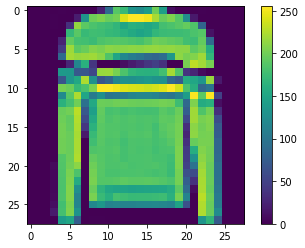

This is :  Pullover   train_label :  2


In [4]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.show()
print('This is : ',class_names[train_labels[5]],'  train_label : ',train_labels[5])

In [5]:
train_images[0,23,23]

194

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

2022-09-02 10:49:26.099124: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=1)  # we pass the data, labels and epochs and watch the magic!

2022-09-02 10:49:26.814000: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.4966 - accuracy: 0.8266


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test loss:',test_loss,'   Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4221 - accuracy: 0.8483
Test loss: 0.42206722497940063    Test accuracy: 0.8482999801635742


In [11]:
predictions = model.predict(test_images)

In [12]:
np.argmax(predictions[0]),test_labels[0]

(9, 9)

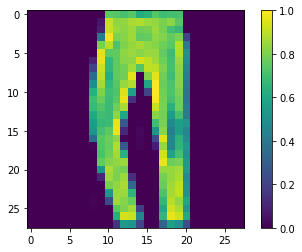

This is :  Trouser   train_label :  1    Prediction label:  1


In [13]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.show()
print('This is : ',class_names[test_labels[5]],'  train_label : ',test_labels[5],'   Prediction label: ',np.argmax(predictions[5]))